### NOTE:
#### List is a collection which is ordered and changeable. Allows duplicate members.
#### Tuple is a collection which is ordered and unchangeable. Allows duplicate members.
#### Set is a collection which is unordered and unindexed. No duplicate members.
#### Dictionary is a collection which is ordered* and changeable. No duplicate members.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### 1)    OUR CSV FILE file has several rows and columns. We want to store each row in a list and the whole file as a list of these rows.

### METHOD 1 [BORING METHOD !!!]

In [2]:
# Python Inbuilt function to read csv file
#strip methods removes whitespace from the end of line, The split method creates a list of strings 
#using the ','characteras the seperator

data = []
for line in open('data1/data2.csv'):
    data.append(line.strip().split(','))

print('Converted csv to python list :',data)

# Python list can be converted to numpy array
arr = np.array(data)
print('Converted Python List to NumPy Array:',arr)

#convert string data of array to numbers
arr1 = np.asarray(arr, float)
print('Conveted Strings of Numpy Array to Numbers:',arr1)

mean = round(np.mean(arr1),1)
median = round(np.median(arr1),1)
print ("mean of array is:",mean,"and Median of array is:",median)


Converted csv to python list : [['7.98631', '16.82952', '19.65165'], ['7.14460', '10.41674', '3.81853'], ['7.48549', '14.61958', '8.87193'], ['8.66521', '14.14244', '10.10248'], ['14.80968', '12.82048', '13.41792']]
Converted Python List to NumPy Array: [['7.98631' '16.82952' '19.65165']
 ['7.14460' '10.41674' '3.81853']
 ['7.48549' '14.61958' '8.87193']
 ['8.66521' '14.14244' '10.10248']
 ['14.80968' '12.82048' '13.41792']]
Conveted Strings of Numpy Array to Numbers: [[ 7.98631 16.82952 19.65165]
 [ 7.1446  10.41674  3.81853]
 [ 7.48549 14.61958  8.87193]
 [ 8.66521 14.14244 10.10248]
 [14.80968 12.82048 13.41792]]
mean of array is: 11.4 and Median of array is: 10.4


In [3]:
arr.shape

(5, 3)

### METHOD 2 [ Directly loading CSV and Coverting it to Array of Numbers

In [4]:
# NumPy Load txt function read csv file automatecally as numpy array and convert string to numbers
# Write your calc_stats function here.
def calc_stats(p):
  data = np.loadtxt(p,delimiter=',')
  return (round(np.mean(data),1),round(np.median(data),1))



### Load the function and evaluate mean and median

In [5]:
# Run `calc_stats` function with loading csv file converting it to list:
mean,median = calc_stats('data1/data2.csv')
print(mean,median)

11.4 10.4


### 2) Write a mean_datasets function that reads in a list of CSV files and returns an array of the mean of each cell in the data files

### APPROACH 1...!!!

In [6]:
# Write your mean_datasets function here
import numpy as np
def mean_datasets(p):  
  for i in range(len(p)):
    p[i] = np.loadtxt(p[i],delimiter = ',')
  sum_data = sum(k for k in p)
  return np.round(sum_data/len(p),1)

# List the Input csv files and Call your function to get average of the csv files
file1 = ['data2/data1.csv', 'data2/data2.csv', 'data2/data3.csv']
file2 = ['data2/data4.csv', 'data2/data5.csv', 'data2/data6.csv']
print("Mean of dataset 1: ",mean_datasets(file1))
print("Mean of dataset 2: ",mean_datasets(file2))

Mean of dataset 1:  [[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
Mean of dataset 2:  [[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


### APPROACH 2

In [7]:
def mean_datasets(files):
    #Find each cell mean across a series of data sets.................
    sum_data = sum(np.loadtxt(file, delimiter=',') for file in files)
    return np.round(sum_data/len(files), 1)
        

files1 = ['data1.csv', 'data2.csv', 'data3.csv']
files2 = ['data4.csv', 'data5.csv', 'data6.csv']
print("Mean of dataset 1: ",mean_datasets(['data2/' + file for file in files1]))
print("Mean of dataset 1: ",mean_datasets(['data2/' + file for file in files2]))

Mean of dataset 1:  [[11.  11.9 13. ]
 [ 9.5  6.8  9.4]
 [ 7.2 11.1 12.5]
 [ 8.8  7.3  9.2]
 [16.6 10.6 10.3]]
Mean of dataset 1:  [[-2.9  2.6  0.6 -5.4]
 [-4.4 -0.7  0.7 -0.2]
 [-1.7  2.5 -8.7 -5.4]]


### 3) WORKING WITH "FLEXIBLE IMAGE TRANSPORT SYSTEM" (FITS ) FILE

#### We're going to use the Astropy module to read and write FITS File

In [8]:
# Importing AstroPY Package and opening fits file to see its header informations
# Opening a FITS file in Astropy returns a HDU (Header/Data Unit) list. 
# Each HDU stores headers and (optionally) image data.
#The header contains metadata about the HDU object, e.g. its dimensions and data type.
#Every HDU can contain image data. The first HDU is called the primary HDU.
#If we want to access individual HDUs, we can index the HDU list object returned by fits.open. 


from astropy.io import fits
hdulist = fits.open('data3/image0.fits')
hdulist.info()

Filename: data3/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


In [9]:
#The image data can be accessed using the data attribute:
data = hdulist[0].data
print(data.shape)

(200, 200)


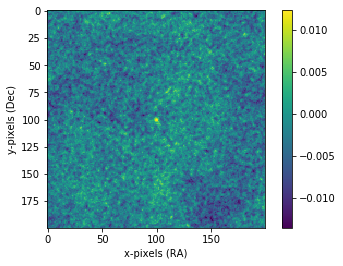

In [10]:
# Plot the 2D array corresponding to Fits file
import matplotlib.pyplot as plt
plt.imshow(data, cmap = plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show()


### TO FIND POSITION OF BRIGHTEST POSITION OF THE PIXEL IN FITS IMAGE

In [11]:
# write a function load_fits to load a file and extract brightest pixel location
def load_fits(imageName):
  hdulist = fits.open(imageName)
  data = hdulist[0].data
  ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
  return ind

### IMAGE0.FITS 

Location of Bright Pixel (RA,DEC):  (100, 100)


<function matplotlib.pyplot.show(*args, **kw)>

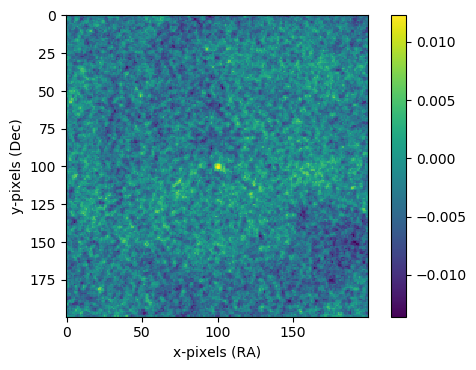

In [12]:
## WORKING WITH IMAGE1.FITS 

# call fuction with loading fits image
bright_pixel_location = load_fits("data3/image0.fits")
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)
# Check the image by plotting it
hdulist = fits.open("data3/image0.fits")
data = hdulist[0].data
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### IMAGE1.FITS 

Location of Bright Pixel (RA,DEC):  (101, 100)


<function matplotlib.pyplot.show(*args, **kw)>

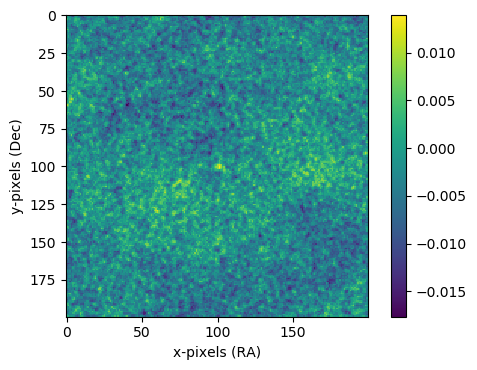

In [13]:
## WORKING WITH IMAGE1.FITS 
bright_pixel_location = load_fits("data3/image1.fits")
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)
# Check the image by plotting it
hdulist = fits.open("data3/image1.fits")
data = hdulist[0].data
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### IMAGE2.FITS 

Location of Bright Pixel (RA,DEC):  (14, 125)


<function matplotlib.pyplot.show(*args, **kw)>

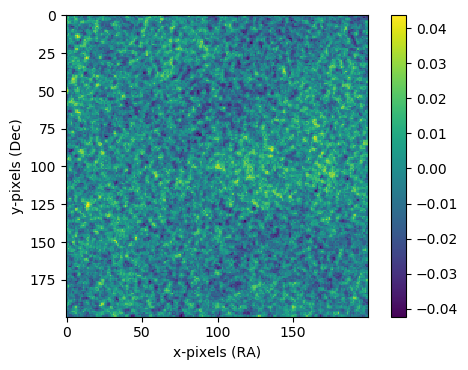

In [14]:
## WORKING WITH IMAGE2.FITS 

bright_pixel_location = load_fits("data3/image2.fits")
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)
# Check the image by plotting it
hdulist = fits.open("data3/image2.fits")
data = hdulist[0].data
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### IMAGE3.FITS 

Location of Bright Pixel (RA,DEC):  (4, 55)


<function matplotlib.pyplot.show(*args, **kw)>

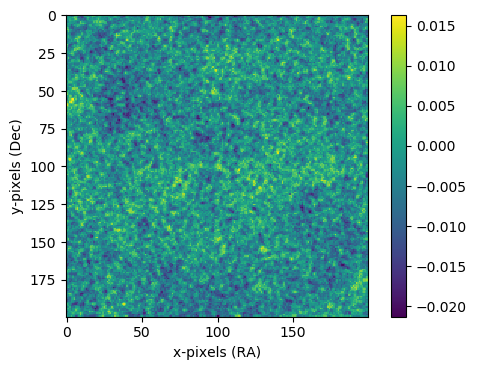

In [15]:
## WORKING WITH IMAGE3.FITS 

bright_pixel_location = load_fits("data3/image3.fits")
print("Location of Bright Pixel (RA,DEC): ",bright_pixel_location)
# Check the image by plotting it
hdulist = fits.open("data3/image3.fits")
data = hdulist[0].data
plt.figure(dpi=100)
plt.imshow(data.T,cmap=plt.cm.viridis)
plt.xlabel("x-pixels (RA)")
plt.ylabel("y-pixels (Dec)")
plt.colorbar()
plt.show

### 4) EVALUATING SINGLE MEAN FITS FILE FROM SET OF FITS FILE

In [16]:
# Write your mean_datasets function here
def mean_fits(p):  
  for i in range(len(p)):
    p[i] = fits.open(p[i])
    p[i] = p[i][0].data
  sum_data = sum(k for k in p)
  return np.round(sum_data/len(p),5)

# Write Plot Function for the matplotlib
def plot_fits(data,dpi):
    plt.figure(dpi=100)    
    plt.imshow(data.T, cmap=plt.cm.viridis)
    plt.xlabel("x-pixels (RA)")
    plt.ylabel("y-pixels (Dec)")
    plt.colorbar()
    plt.show()
    

Pulsar Detection at (RA,DEC): (101, 100)


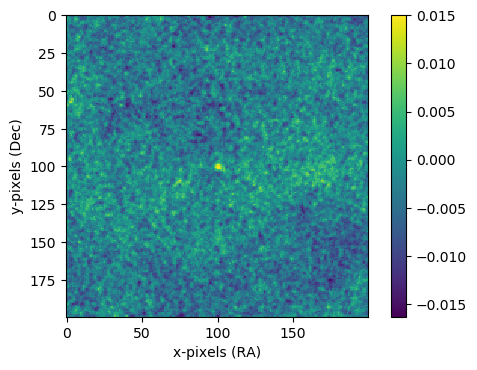

In [17]:
# List the Input FITS files and Call your function to get average of the FITS files
file1 = ['data5/image{}.fits'.format(str(i)) for i in range(11)]
#['data5/image0.fits', 'data4/image1.fits', 'data4/image2.fits','data4/image3.fits','data4/image4.fits']
data = mean_fits(file1)
ind = np.unravel_index(np.argmax(data), data.shape)

print("Pulsar Detection at (RA,DEC):",ind)

# Plot the Average FITS File
plot_fits(data,100)


### USING 1000 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_1000

In [18]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 500 # no of image file to stack, max limit 1000
file1 = ['pulsar_example_fits_1000/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
data = mean_fits(file1)

Pulsar Detection at (RA,DEC): (171, 161)


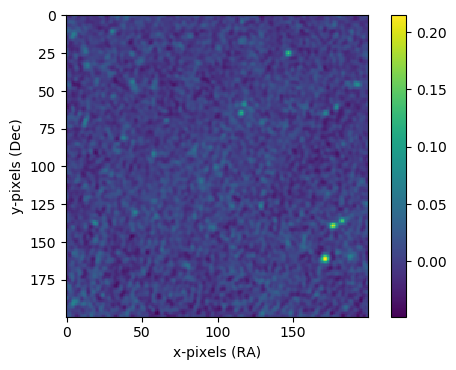

In [19]:
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plot_fits(data,100)

### USING 7330 NOS OF FITS FILE FOR STACKING FORM FOLDER PULSAR_EXAMPLE_FITS_7330

In [20]:
# List the Input FITS files and Call your function to get average of the FITS files
n = 7330 # no of image file to stack, max limit 7329
file1 = ['pulsar_example_fits_7330/{}.fits'.format(str(i).zfill(4)) for i in range(n)]
mean_data = mean_fits(file1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
  File "<ipython-input-20-adf041e7e4f1>", line 4, in <module>
    mean_data = mean_fits(file1)
  File "<ipython-input-16-e7798a76c100>", line 5, in mean_fits
    p[i] = p[i][0].data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/utils/decorators.py", line 744, in __get__
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/image.py", line 230, in data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/image.py", line 697, in _get_scaled_image_data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/hdu/base.py", line 507, in _get_raw_data
  File "/Users/user/opt/anaconda3/lib/python3.7/site-packages/astropy/io/fits/file.py", line 326, in readarray
OSError: [Errno 24] Too many open files

During handling of the above exception,

OSError: [Errno 24] Too many open files

In [ ]:
ind = np.unravel_index(np.argmax(data, axis=None), data.shape)
print("Pulsar Detection at (RA,DEC):",ind)
# Plot the Average FITS File
plot_fits(mean_data,100)